In [6]:
# STEP 8.1: Prepare salary time series for Prophet
#
# GOAL:
# Convert dataset into yearly average salary data.
#
# PROCESS:
# - Group by work_year
# - Compute mean salary_in_usd
# - Reset index to create dataframe
# - Rename columns to Prophet format:
#     work_year → ds
#     salary_in_usd → y
#
# OUTPUT:
# A 2-column dataframe ready for Prophet (ds, y)

import pandas as pd

# Load feature-engineered dataset
df = pd.read_csv("ds_salaries_features_v1.csv")

# Group by year and compute average salary
salary_ts = (
    df.groupby("work_year")["salary_in_usd"]
      .mean()
      .reset_index()
)

# Rename columns to Prophet format
salary_ts.columns = ["ds", "y"]

# Convert ds (year) into datetime
salary_ts["ds"] = pd.to_datetime(salary_ts["ds"], format="%Y")

salary_ts.head()



,ds,y
0,2020-01-01,95813.000000
1,2021-01-01,99853.792627
2,2022-01-01,124522.006289


In [7]:
# STEP 8.2: Train Prophet model on salary trends
#
# - Initialize Prophet
# - Fit model using salary time series dataframe
#
# GOAL:
# Learn long-term salary growth trend across years

from prophet import Prophet

salary_model = Prophet()

salary_model.fit(salary_ts)




Importing plotly failed. Interactive plots will not work.
21:53:50 - cmdstanpy - INFO - Chain [1] start processing
21:53:51 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# STEP 8.3: Generate future dataframe for salary forecasting

# Use the trained Prophet model to extend the timeline forward

# Create a dataframe containing future yearly dates
# periods = number of years to forecast into the future (5 recommended)
# freq = yearly frequency so Prophet generates one date per year

# Store the future dataframe in a variable called "future"

# Preview the first few rows to confirm structure

future = salary_model.make_future_dataframe(
    periods=5,
    freq="Y"
)

future.tail()




/Users/zihan/nba-predictor/.venv/lib/python3.14/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
3,2022-12-31
4,2023-12-31
5,2024-12-31
6,2025-12-31
7,2026-12-31


In [9]:
# STEP 8.4: Forecast salary values for future years
#
# - Use trained Prophet model to predict future dataframe
# - Prophet outputs:
#     yhat (forecast)
#     yhat_lower (lower bound)
#     yhat_upper (upper bound)
#
# GOAL:
# Obtain projected salary growth trend

salary_forecast = salary_model.predict(future)

salary_outputs = salary_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]






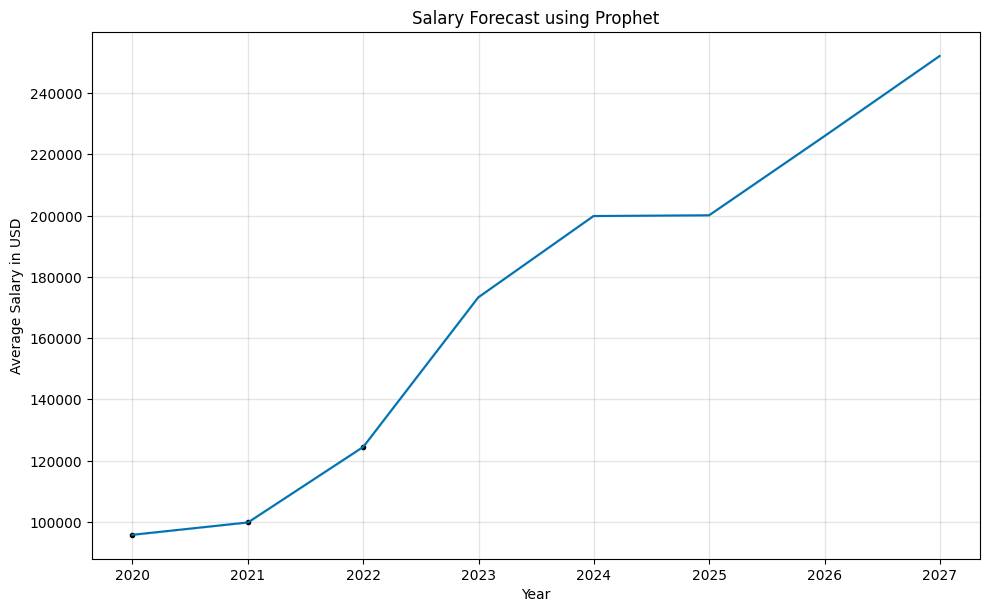

In [10]:
# STEP 8.5: Plot salary forecast
#
# - Plot historical salary data
# - Overlay Prophet forecast
# - Show uncertainty intervals
#
# GOAL:
# Visualize salary growth trajectory over time

import matplotlib.pyplot as plt

fig1 = salary_model.plot(salary_forecast)
plt.title("Salary Forecast using Prophet")
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.show()








In [18]:
# STEP 8.6: Prepare role demand time series
#
# GOAL:
# Count number of postings per role per year.
#
# PROCESS:
# - Group by work_year and role_category
# - Count rows
# - Filter for major roles (e.g., Data Engineer, ML Engineer)
# - Rename columns to Prophet format:
#     work_year → ds
#     count → y

# Group by work_year and role_category
role_postings = (
    df.groupby(["work_year", "role_category"])
    # Count rows
    .size()
    .reset_index(name='count')
    # Filter for major roles
    .query("role_category in ['Data Engineer', 'ML Engineer']"
)
)

# Rename columns to Prophet format
role_postings.columns = ["ds", "role_category", "y"]





In [19]:
# STEP 8.7: Train Prophet model on role demand
#
# - Filter dataframe for a single role (example: ML Engineer)
# - Fit Prophet on yearly counts
#
# GOAL:
# Learn demand trend for that role

ml_engineer_ts = role_postings.query("role_category == 'ML Engineer'").drop(columns=['role_category'])
